In [1]:
def convert_and_trim_bb(rect, original_size, input_size):
    # extract the starting and ending (x, y)-coordinates of the bounding box
    startX = rect.left() * (original_size / input_size)
    startY = rect.top() * (original_size / input_size)
    endX = rect.right() * (original_size / input_size)
    endY = rect.bottom() * (original_size / input_size)

    # return our bounding box coordinates
    return (int(startX), int(startY), int(endX), int(endY))

In [2]:
import imutils
import time
import dlib
import cv2 as cv
import os
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
model = "./__models/04_MMOD/mmod_human_face_detector.dat"
base_path = "./dataset/dataset_augmented/test/images"
images = os.listdir(base_path)

# DLib CNN Face Detection
detector = dlib.cnn_face_detection_model_v1(model)

In [4]:
times = []
bboxes = []

for idx, img in enumerate(images):

    # Load image, resize, convert from BGR to RGB channel
    image = cv.imread(os.path.join(base_path, img))
    image = imutils.resize(image, width=600)
    rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    # perform face detection using dlib's face detector
    start = time.time()
    results = detector(rgb, 0)
    end = time.time()

    times.append(end - start)
    print("[INFO] {:.6f} for image".format(end - start) + f" {idx + 1}/{len(images)}")

    # Convert dlib rectangles to bboxes
    boxes = [convert_and_trim_bb(r.rect, 640, 600) for r in results]
    bboxes.append(boxes)

[INFO] 3.526060 for image 1/790
[INFO] 3.609499 for image 2/790
[INFO] 3.518502 for image 3/790
[INFO] 3.532502 for image 4/790
[INFO] 3.510492 for image 5/790
[INFO] 3.513501 for image 6/790
[INFO] 3.527542 for image 7/790
[INFO] 3.508499 for image 8/790
[INFO] 3.511502 for image 9/790
[INFO] 3.511999 for image 10/790
[INFO] 3.518999 for image 11/790
[INFO] 3.515001 for image 12/790
[INFO] 3.495000 for image 13/790
[INFO] 3.508541 for image 14/790
[INFO] 3.508500 for image 15/790
[INFO] 3.515039 for image 16/790
[INFO] 3.528003 for image 17/790
[INFO] 3.506999 for image 18/790
[INFO] 3.513499 for image 19/790
[INFO] 3.546999 for image 20/790
[INFO] 3.535501 for image 21/790
[INFO] 3.538001 for image 22/790
[INFO] 3.553002 for image 23/790
[INFO] 3.548041 for image 24/790
[INFO] 3.534999 for image 25/790
[INFO] 3.557500 for image 26/790
[INFO] 3.545000 for image 27/790
[INFO] 3.524500 for image 28/790
[INFO] 3.547999 for image 29/790
[INFO] 3.505498 for image 30/790
[INFO] 3.517501 for

In [5]:
import pandas as pd
import numpy as np

p_images = []
p_times = []
p_x1 = []
p_y1 = []
p_x2 = []
p_y2 = []

for p_image, p_time, p_bbox in zip(images, times, bboxes):

    # No Bbox
    if len(p_bbox) == 0:
        p_images.append(p_image)
        p_times.append(p_time)

        p_x1.append(np.NAN)
        p_y1.append(np.NAN)
        p_x2.append(np.NAN)
        p_y2.append(np.NAN)

    # Bbox
    for box in p_bbox:
        # TODO :: Adjust format (x1, y1, ?, ?)
        p_images.append(p_image)
        p_times.append(p_time)

        p_x1.append(box[0])
        p_y1.append(box[1])
        p_x2.append(box[2])
        p_y2.append(box[3])

df = pd.DataFrame(list(zip(p_images, p_times, p_x1, p_y1, p_x2, p_y2)), columns=[
                  "Image", "Time", "X1", "Y1", "X2", "Y2"])
df

,Image,Time,X1,Y1,X2,Y2
0,1001_jpg.rf.b7c44a27e79dbc4de661327ba01c1edd.jpg,3.526060,218.0,230.0,469.0,482.0
1,1005_jpg.rf.bb3f3203348f9e88224f7467ef52843c.jpg,3.609499,243.0,154.0,494.0,406.0
2,1014_jpg.rf.c539a1eadeef2d13f1bf7d0f7b5c254c.jpg,3.518502,151.0,190.0,325.0,365.0
3,1061_jpg.rf.44dd02d8bd98efc8deac4f6fbc60ef99.jpg,3.532502,320.0,166.0,404.0,250.0
4,1061_jpg.rf.44dd02d8bd98efc8deac4f6fbc60ef99.jpg,3.532502,200.0,81.0,284.0,165.0
...,...,...,...,...,...,...
1111,986_jpg.rf.6f8ff4f13b76e435399fe4d604c285b3.jpg,3.484538,243.0,205.0,494.0,456.0
1112,987_jpg.rf.dff0e90c55a7621864aee639fd482d98.jpg,3.469500,217.0,157.0,301.0,242.0
1113,987_jpg.rf.dff0e90c55a7621864aee639fd482d98.jpg,3.469500,320.0,106.0,404.0,190.0
1114,98_jpg.rf.c929bd3c5be065cfdc29dfe04ff72d87.jpg,3.461000,250.0,237.0,352.0,339.0


1148_jpg.rf.02b4f42bf07950906637f830582e835b.jpg
167 129 419 380


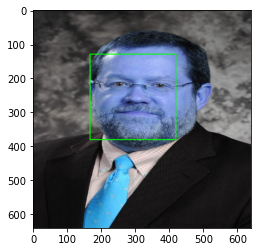

In [6]:
image_names = np.unique(df.Image)
current_entry = image_names[8] # "1_jpg.rf.e3e0a48dd72710db0188e9c100a49f5f.jpg" # 
print(current_entry)

current_df = df[df['Image'] == current_entry]

# Read image from your local file system
testImage = cv.imread(os.path.join(base_path, current_entry))

for df_idx, row in current_df.iterrows():
    if np.isnan(row['X1']):
        continue

    x1 = int(row['X1'])
    y1 = int(row['Y1'])
    x2 = int(row['X2'])
    y2 = int(row['Y2'])

    print(x1, y1, x2, y2)

    cv.rectangle(
        testImage,
        (x1, y1),
        (x2, y2),
        (0, 255, 0),
        2
    )

plt.figure(figsize=(4, 4))
plt.imshow(testImage)
plt.show()


In [7]:
model_name = "MMOD"

folder_path = f"./test_results/{model_name}"
os.mkdir(folder_path)

results_path = f"./test_results/{model_name}.xlsx"


df.to_excel(results_path, index=False)